In [1]:
!pip install --upgrade albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.6/dist-packages (0.4.5)


In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import albumentations as A
import random

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [2]:
!gdown --id 1rZX15GYUJ44kEiuZOPUL4quOjcqwi-f5 --output documents.zip



Downloading...
From: https://drive.google.com/uc?id=1rZX15GYUJ44kEiuZOPUL4quOjcqwi-f5
To: /content/documents.zip
100% 438k/438k [00:00<00:00, 64.5MB/s]


In [3]:
!unzip -q documents.zip

replace form.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace license.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
!ls

documents.zip  form.png  license.jpeg  sample_data


In [0]:
BOX_COLOR = (255, 0, 0)
thickness = 2
def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2):
    x_min, y_min, x_max, y_max = map(lambda v: int(v), bbox)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

In [0]:
def show_image(image, bbox):
  image = visualize_bbox(image.copy(),bbox)
  f = plt.figure(figsize=(18, 12))
  plt.imshow(
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    interpolation='nearest'
  )
  plt.axis('off')
  f.tight_layout()
  plt.show()

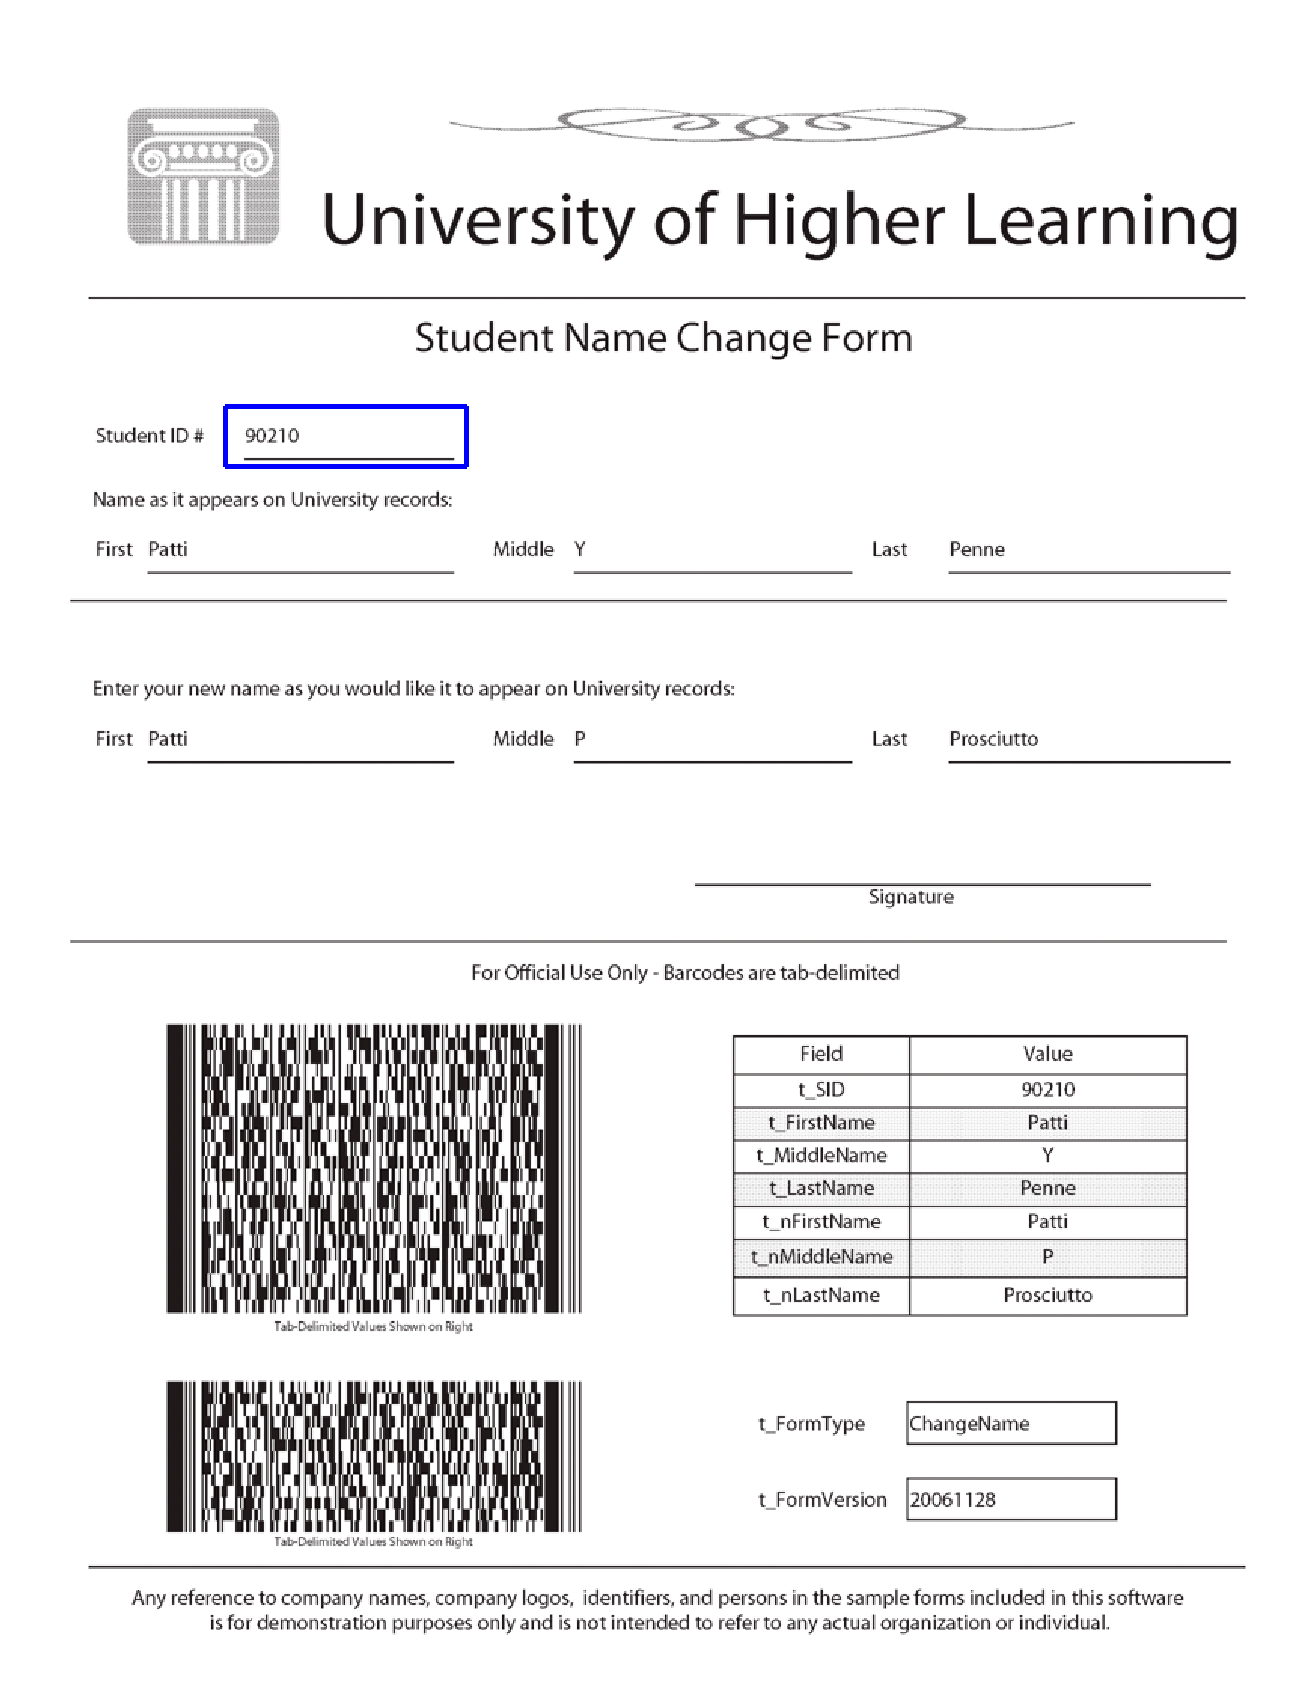

In [7]:
form = cv2.imread("form.png")
STUDENT_ID_BBOX = [140, 260, 300, 300]
show_image(form, bbox=STUDENT_ID_BBOX)

In [0]:
def show_augmented(augmentation, image, bbox):
  augmented = augmentation(image=image, bboxes=[bbox], field_id=['1'])
  show_image(augmented['image'], augmented['bboxes'][0])

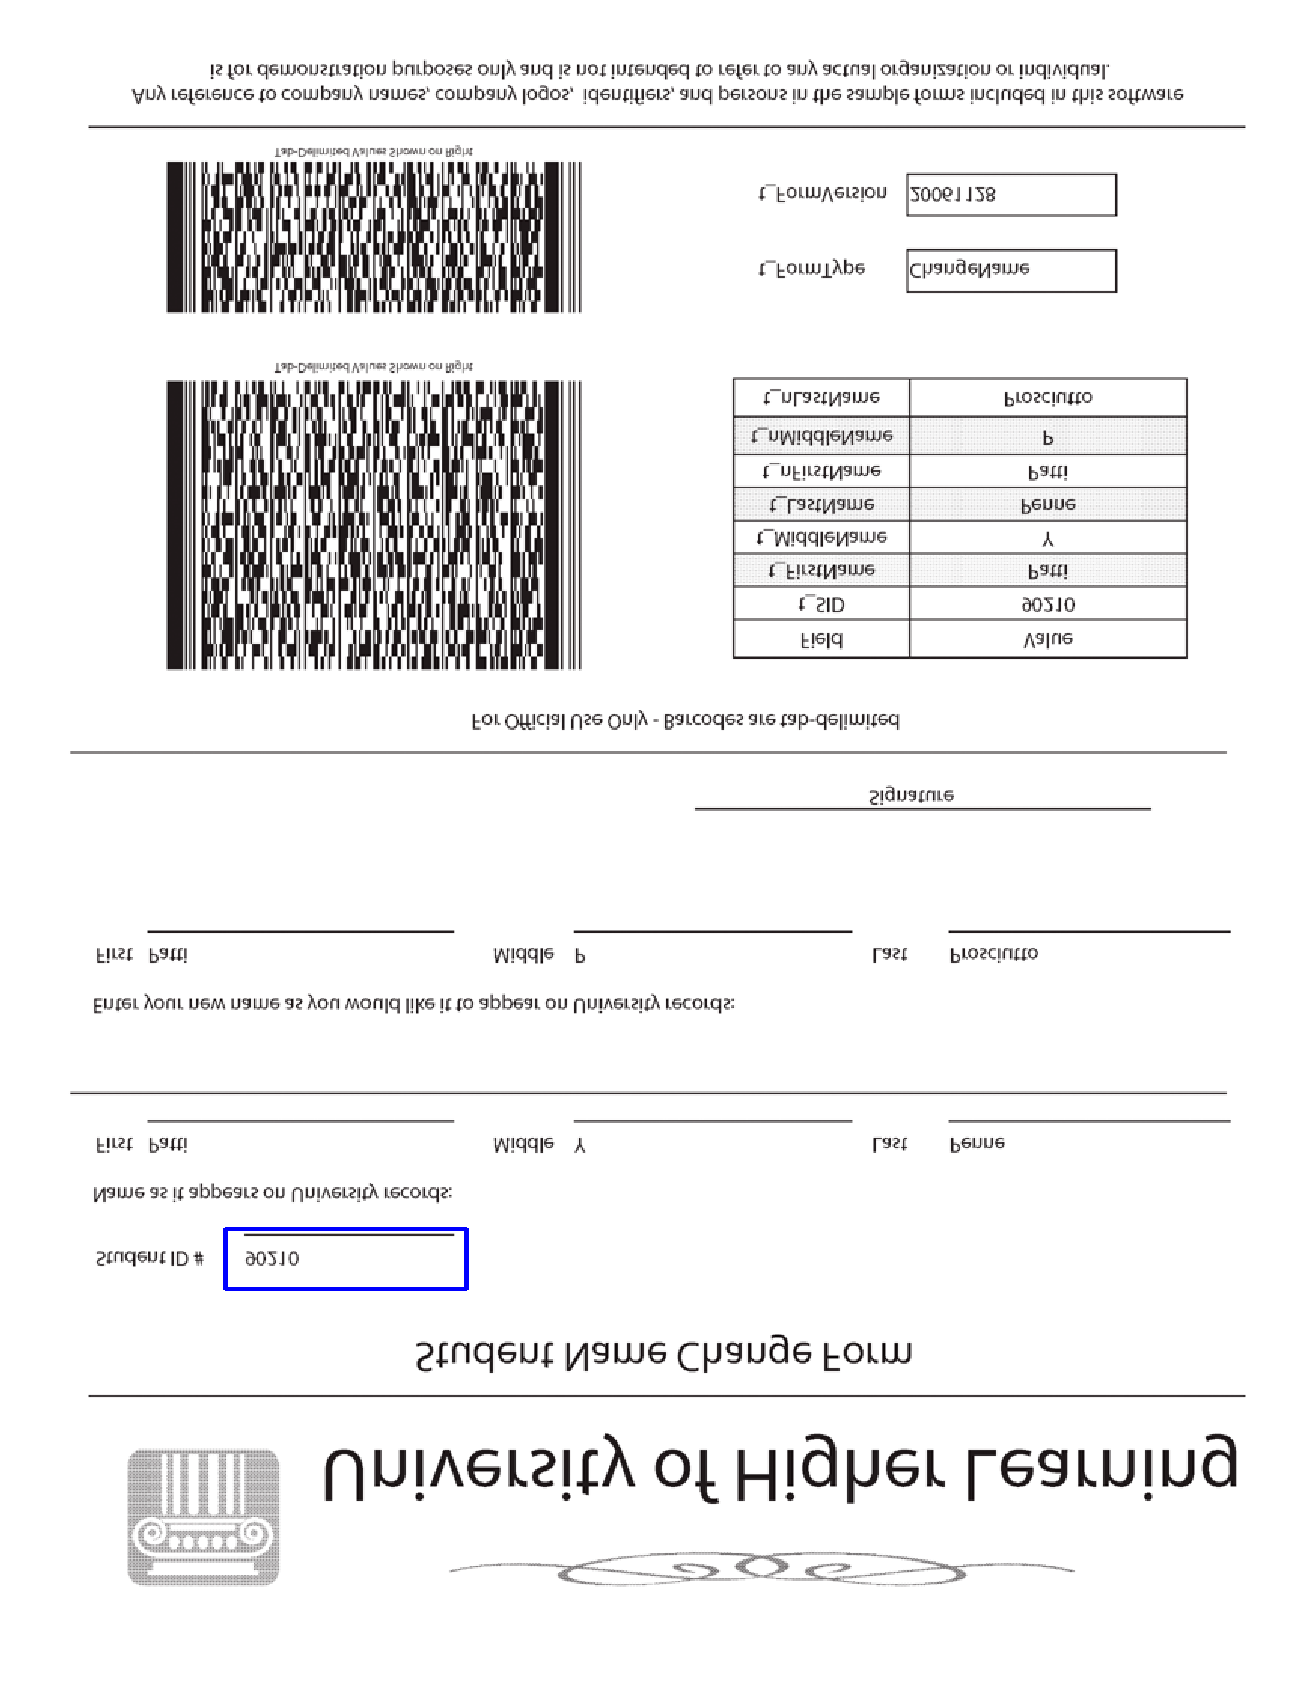

In [10]:
bbox_params = A.BboxParams(
  format='pascal_voc', 
  min_area=1, 
  min_visibility=0.5, 
  label_fields=['field_id']
)
aug = A.Compose([
    A.Flip(always_apply=True)
], bbox_params=bbox_params)

show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
aug = A.Compose([
  A.Rotate(limit=80, always_apply=True)
], bbox_params=bbox_params)

show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
aug = A.Compose([
    A.RGBShift(
      always_apply=True, 
      r_shift_limit=100, 
      g_shift_limit=100,
      b_shift_limit=100
    ),
], bbox_params=bbox_params)

show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
aug = A.Compose([
    A.RandomBrightnessContrast(always_apply=True),
], bbox_params=bbox_params)

show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
aug = A.Compose([
    A.GaussNoise(
      always_apply=True,
      var_limit=(100, 300),
      mean=150
    ),
], bbox_params=bbox_params)

show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
doc_aug = A.Compose([
    A.Flip(p=0.25),
    A.RandomGamma(gamma_limit=(20, 300), p=0.5),
    A.RandomBrightnessContrast(p=0.85),
    A.Rotate(limit=35, p=0.9),
    A.RandomRotate90(p=0.25),
    A.RGBShift(p=0.75),
    A.GaussNoise(p=0.25)
], bbox_params=bbox_params)
show_augmented(doc_aug, form, STUDENT_ID_BBOX)

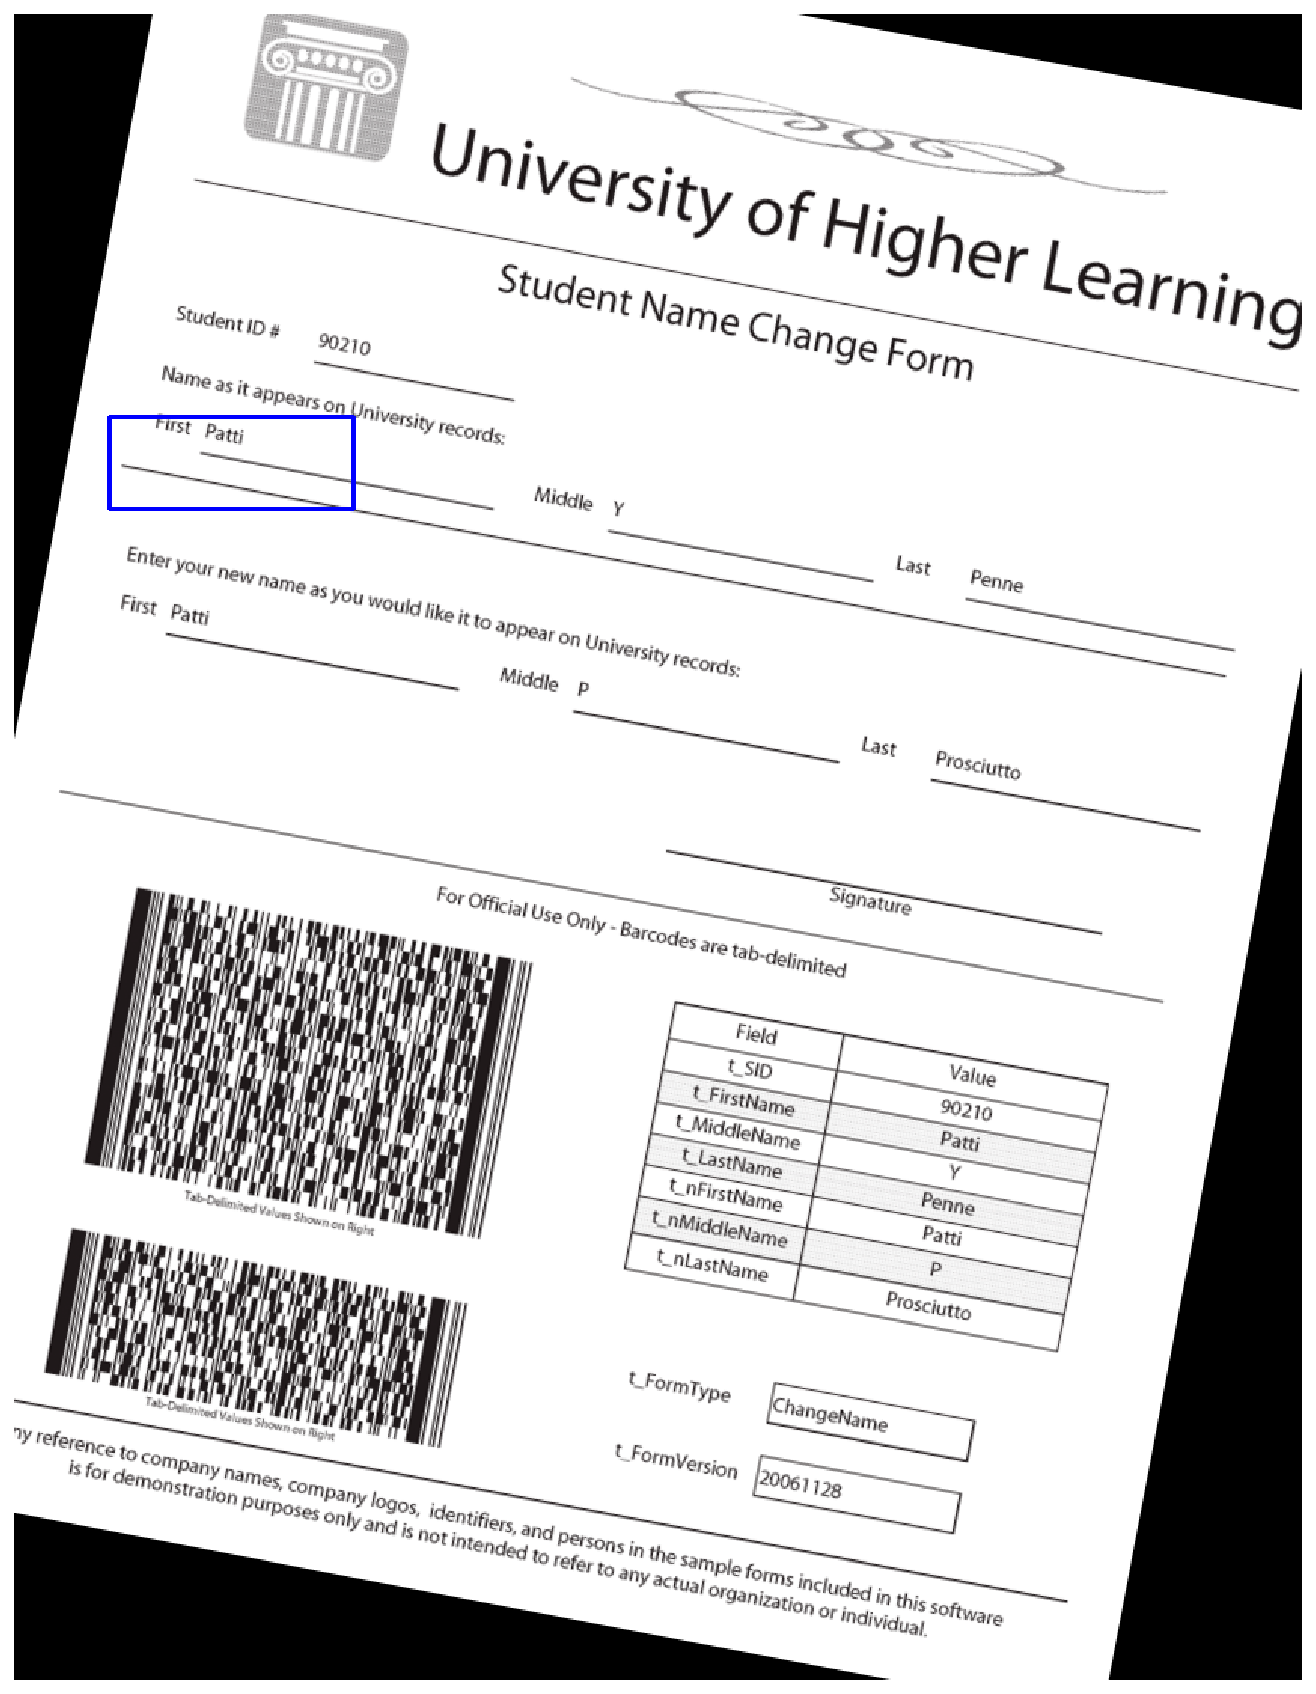

In [18]:
import cv2
aug = A.ShiftScaleRotate(shift_limit=0.05, 
                         scale_limit=0.1,
                         rotate_limit=45,
                         border_mode=cv2.BORDER_CONSTANT, 
                         p=0.5)
show_augmented(aug, form, STUDENT_ID_BBOX)

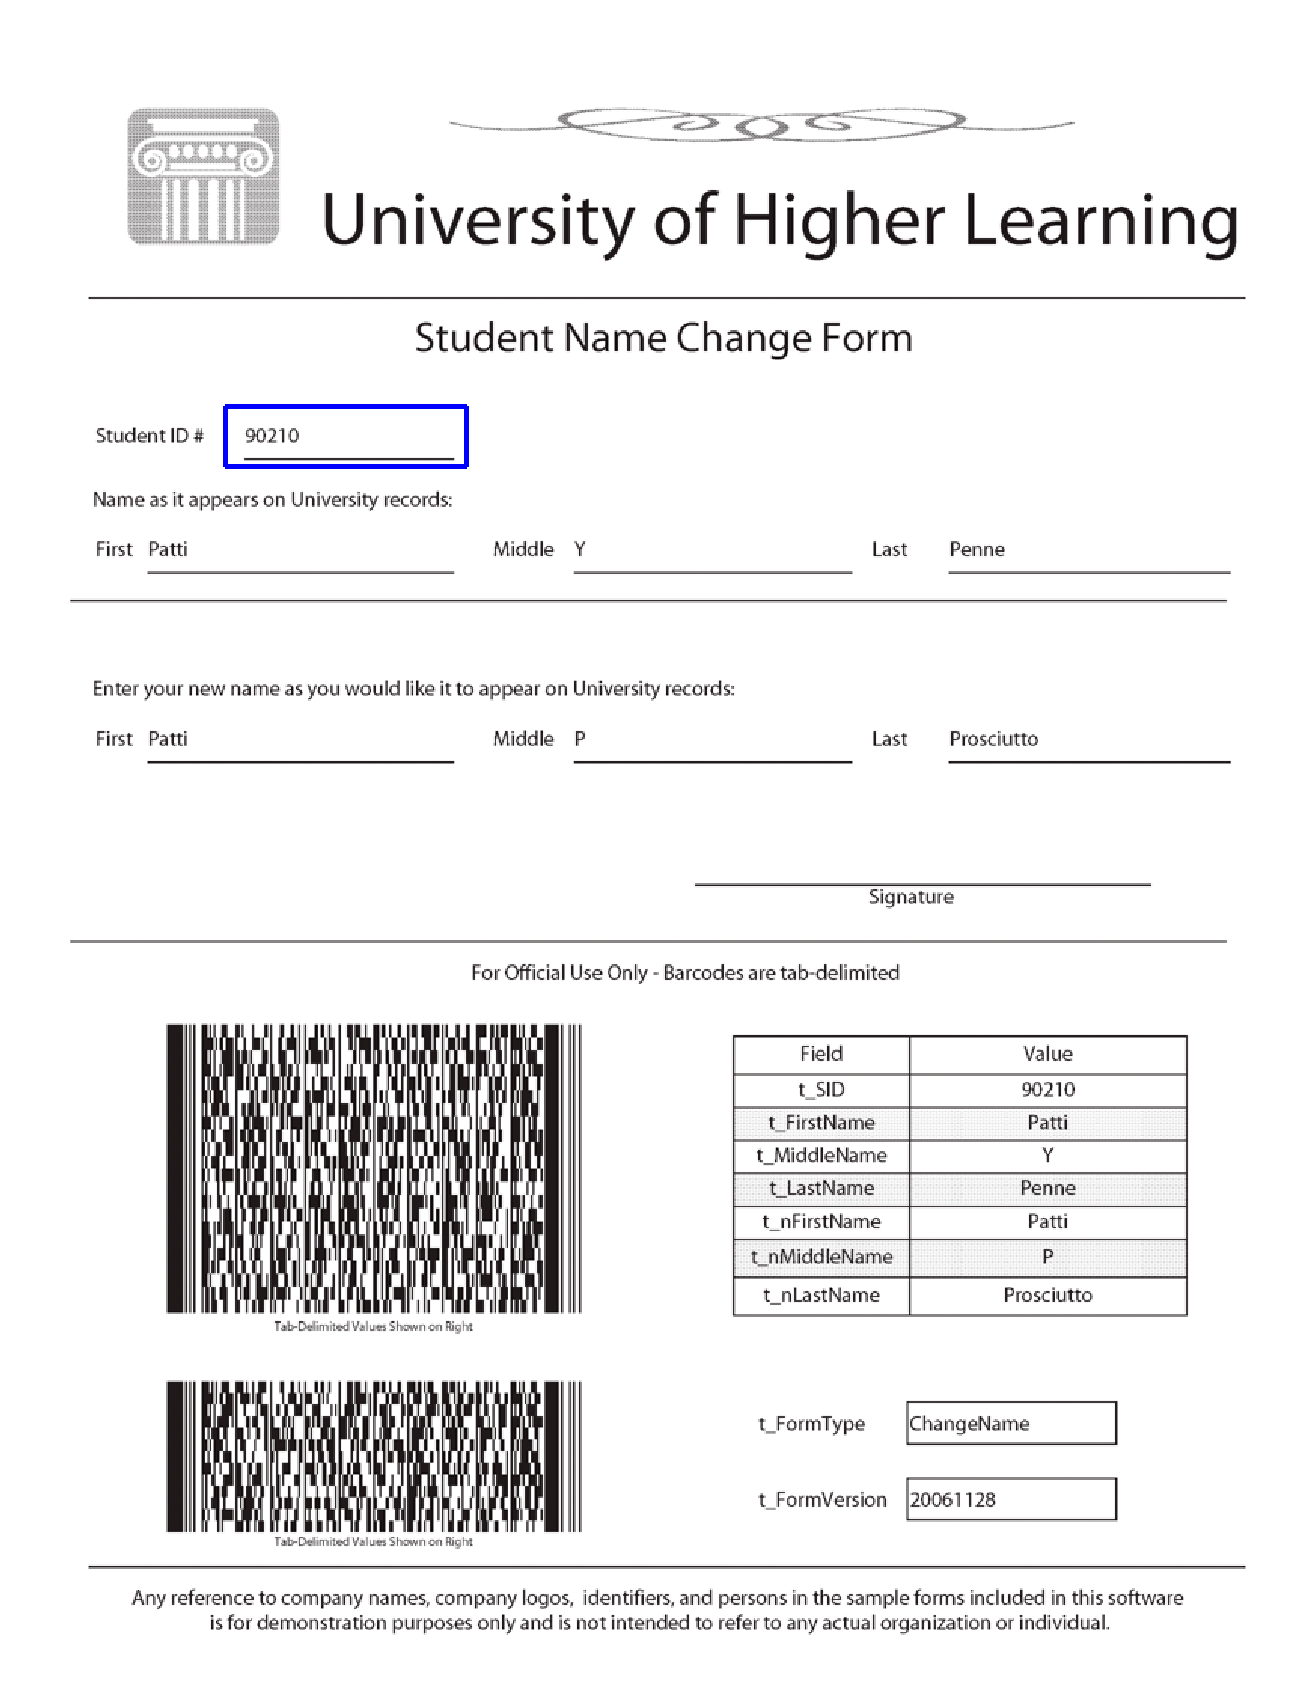

In [16]:
import cv2
aug = A.OpticalDistortion(distort_limit=0.11,
                          shift_limit=0.15,
                          border_mode=cv2.BORDER_CONSTANT,
                          p=0.5)
show_augmented(aug, form, STUDENT_ID_BBOX)

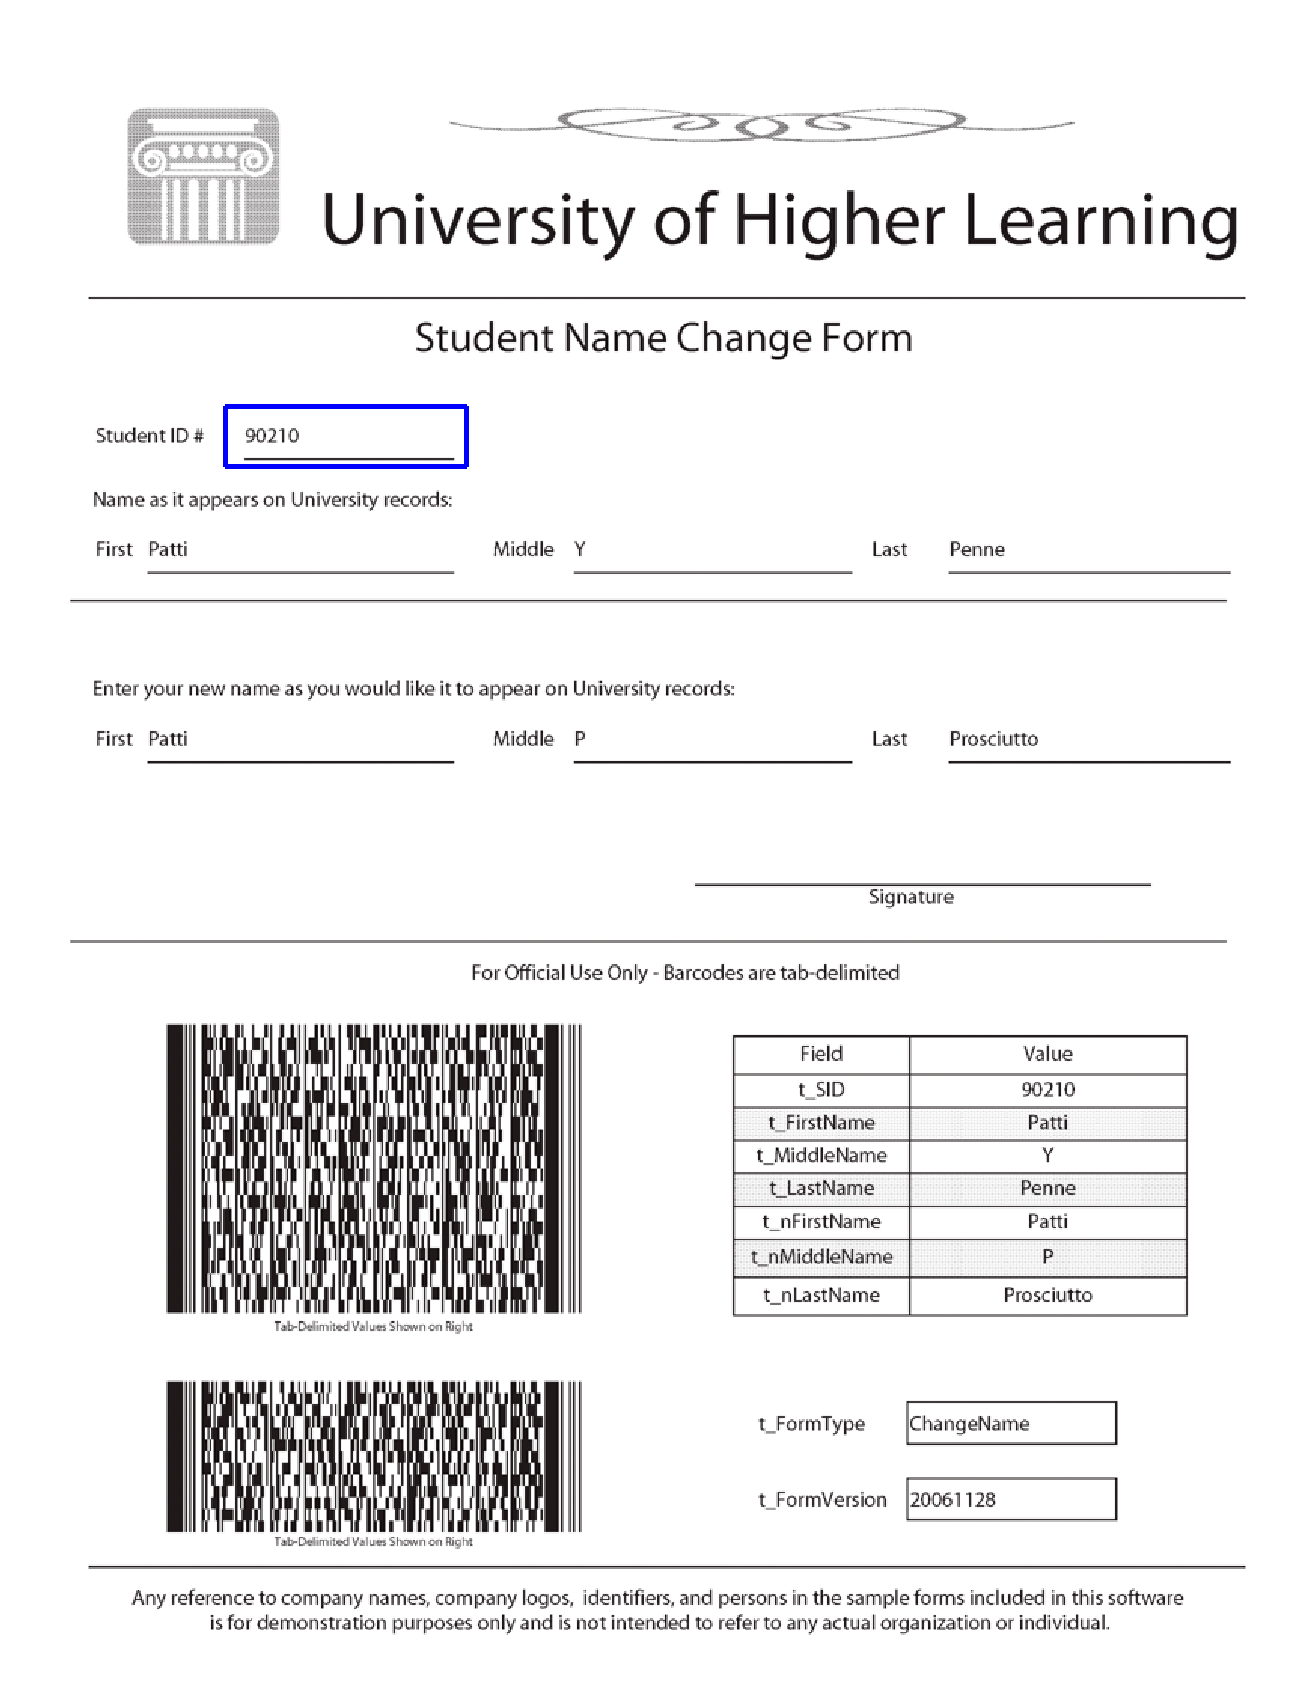

In [14]:
doc_aug = A.Compose([
                    A.OneOf([
                            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1,
                                               rotate_limit=45,
                                               border_mode=cv2.BORDER_CONSTANT, value=0,
                                               p=0.5),
                            A.ElasticTransform(alpha_affine=0,
                                                alpha=35,
                                                sigma=5,
                                                border_mode=cv2.BORDER_CONSTANT,
                                                value=0,
                                                p=0.5),
                            A.OpticalDistortion(distort_limit=0.11,
                                                shift_limit=0.15,
                                                border_mode=cv2.BORDER_CONSTANT,
                                                value=0,
                                                p=0.5),
                            A.GridDistortion(border_mode=cv2.BORDER_CONSTANT,
                                              value=0,
                                              p=0.5),
                            A.NoOp()
                            ]),
                     ], bbox_params=bbox_params)
show_augmented(doc_aug, form, STUDENT_ID_BBOX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


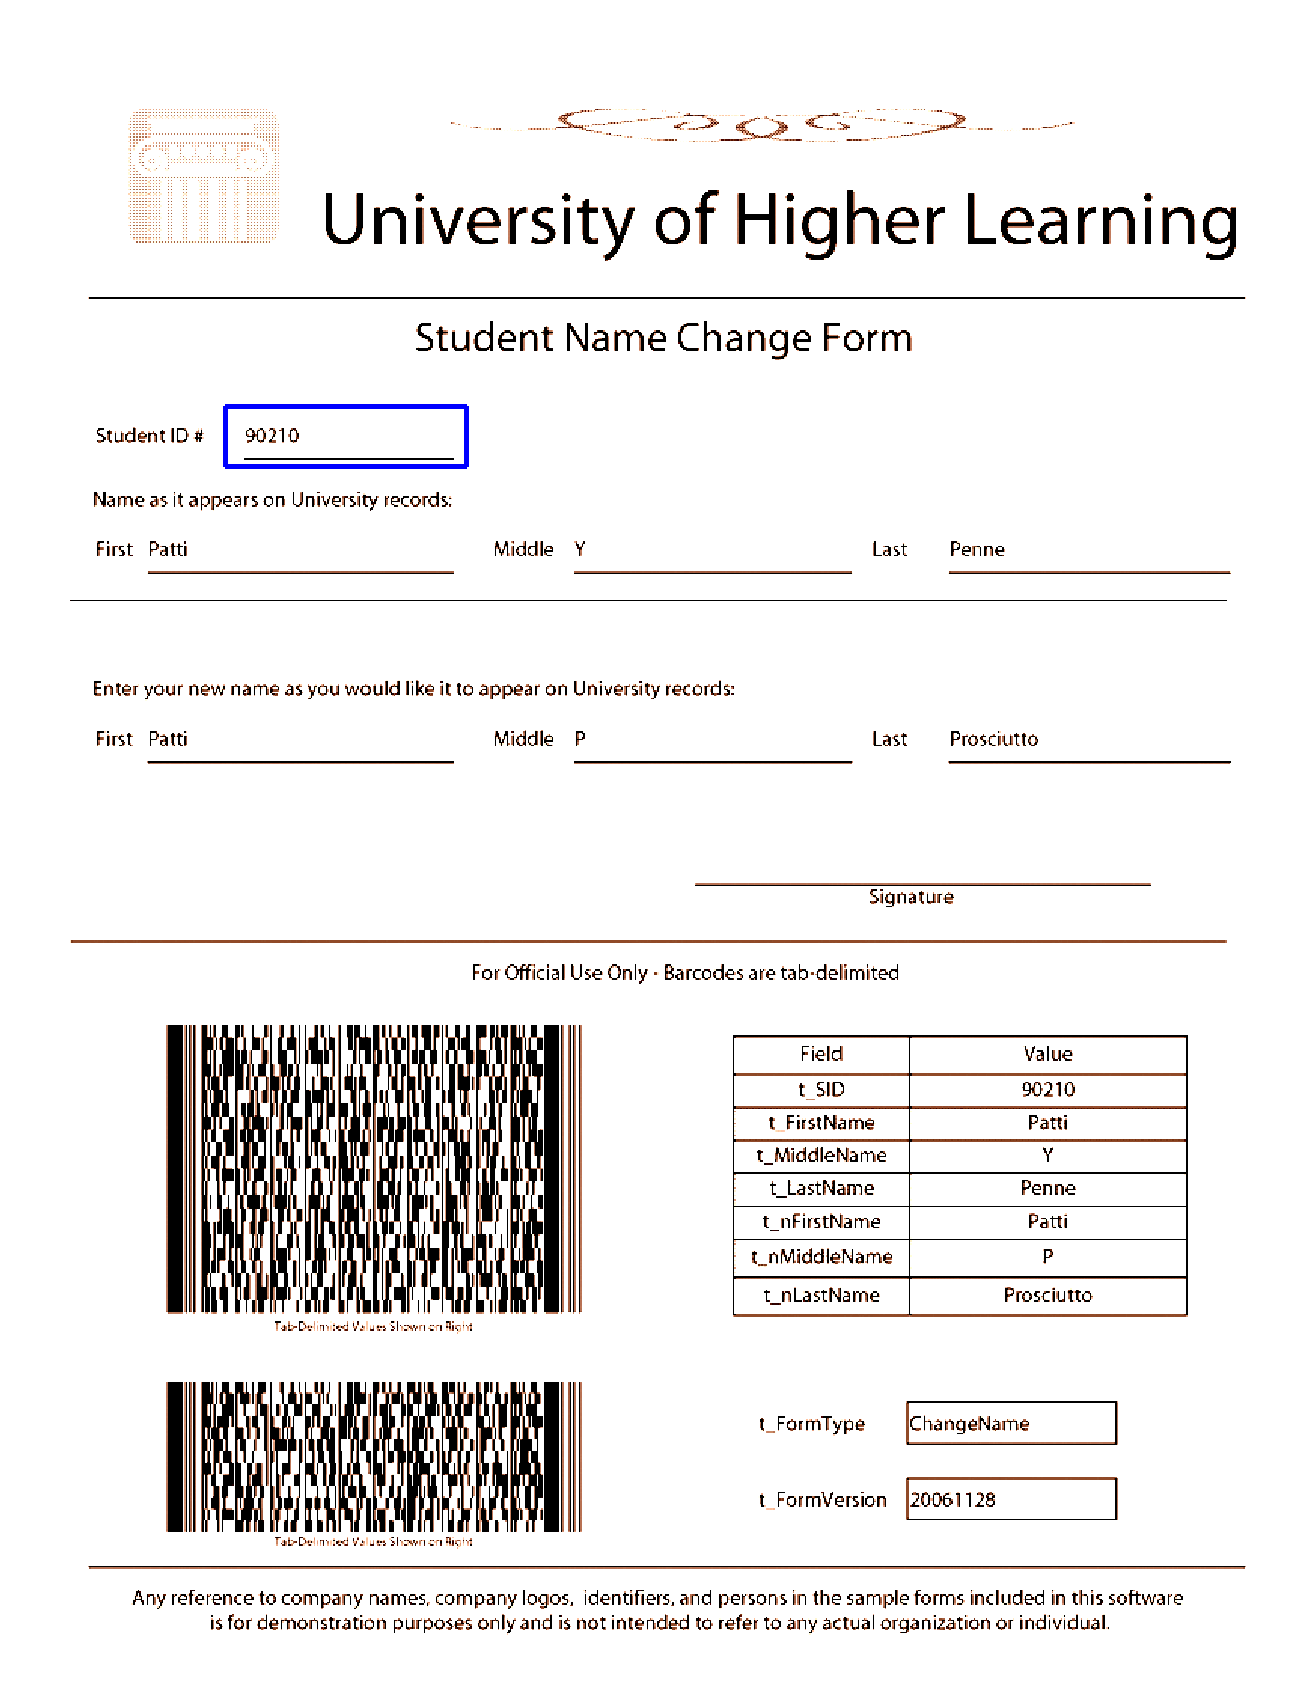

In [23]:
aug = A.Compose([
                 A.Normalize()
      ], bbox_params=bbox_params)
show_augmented(aug, form, STUDENT_ID_BBOX)

In [0]:
def ex1_augmentations():
    return A.Compose([
                  A.HorizontalFlip(),
                  A.RandomBrightnessContrast(),
                  A.OneOf([
                          A.ShiftScaleRotate(scale_limit=0.05, rotate_limit=15,
                                            border_mode=cv2.BORDER_CONSTANT),
                                            A.IAAAffine(),
                                            A.IAAPerspective(),
                                            A.NoOp()
                          ]),
                  A.HueSaturationValue(),
                  A.Normalize()
  ])
def ex2_augmentations():
    return A.Compose([
                  A.HorizontalFlip(),
                  A.ShiftScaleRotate(scale_limit=0.1, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT),
                  A.OneOf([A.GaussianBlur(), A.IAASharpen(), A.NoOp()]),
                  A.OneOf([A.CoarseDropout(), A.MaskDropout(max_objects=5),
                  A.NoOp()]),
                  A.GaussNoise(),
                  A.OneOf([A.RandomBrightnessContrast(), A.CLAHE(),
                  A.HueSaturationValue(), A.RGBShift(), A.RandomGamma()]),
                  A.RandomFog(fog_coef_lower=0.01, fog_coef_upper=0.3,
                  p=0.1),
                  A.Normalize(),
     ])
    
def ex3_augmentations():
    return A.Compose([
                  A.RandomRotate90(),
                  A.Transpose(),
                  A.ShiftScaleRotate(
                  scale_limit=0.1, rotate_limit=45,
                  border_mode=cv2.BORDER_CONSTANT, mask_value=0, value=0
                  ),
                  A.ElasticTransform(border_mode=cv2.BORDER_CONSTANT,
                                     alpha_affine=5, mask_value=0, value=0),
                  # Add occasion blur
                  A.OneOf([A.GaussianBlur(), A.GaussNoise(),
                           A.IAAAdditiveGaussianNoise(), A.NoOp()]),
                  # D4 Augmentations
                  A.OneOf([A.CoarseDropout(),
                           A.MaskDropout(max_objects=10), A.NoOp()]),
                   # Spatial-preserving augmentations:
                  A.OneOf([
                          A.RandomBrightnessContrast(brightness_by_max=True),
                          A.CLAHE(),
                          A.HueSaturationValue(),
                          A.RGBShift(),
                          A.RandomGamma(),
                          A.NoOp()]),
                  # Weather effects
                  A.OneOf([
                           A.RandomFog(fog_coef_lower=0.01,fog_coef_upper=0.3, p=0.1), 
                           A.NoOp()]),
                  A.Normalize()
    ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


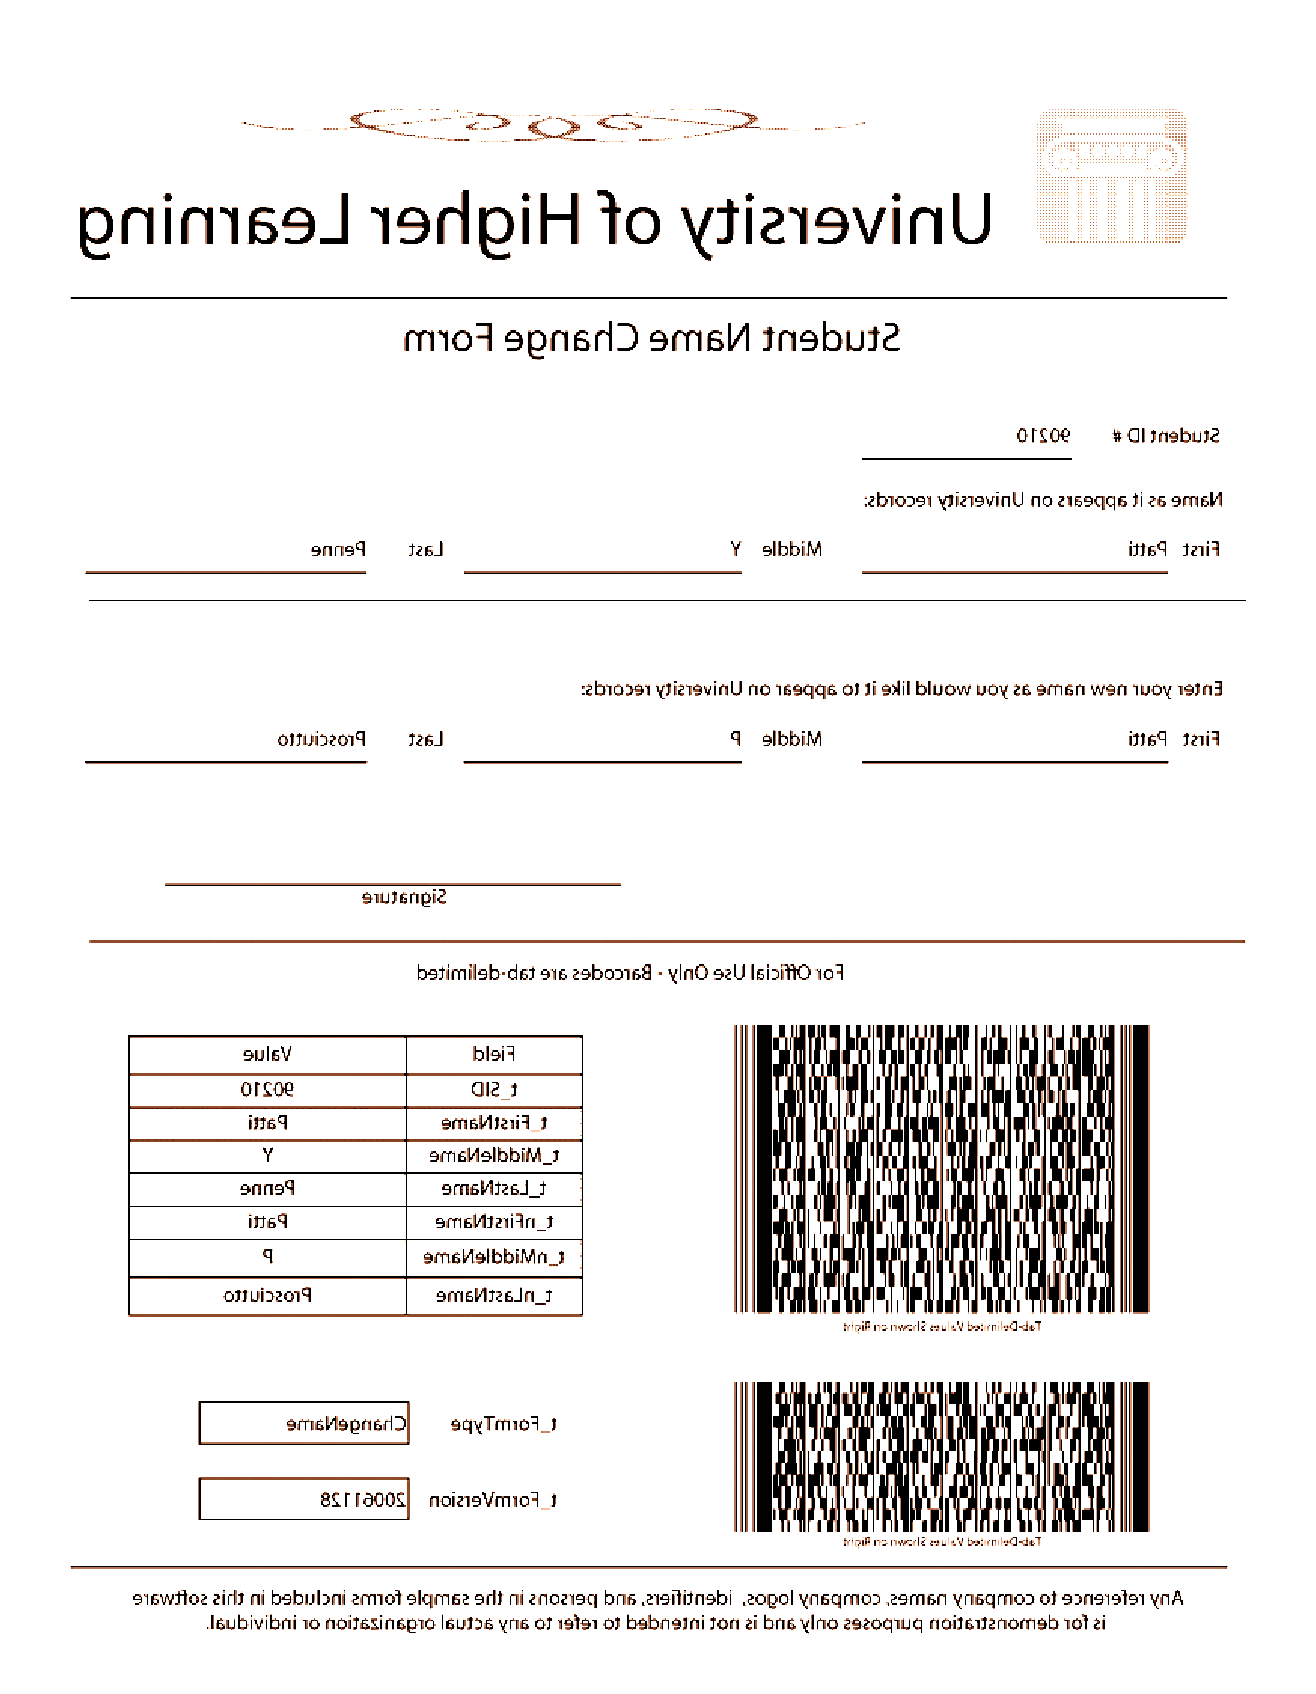

In [42]:
show_augmented(ex1_augmentations(), form, STUDENT_ID_BBOX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


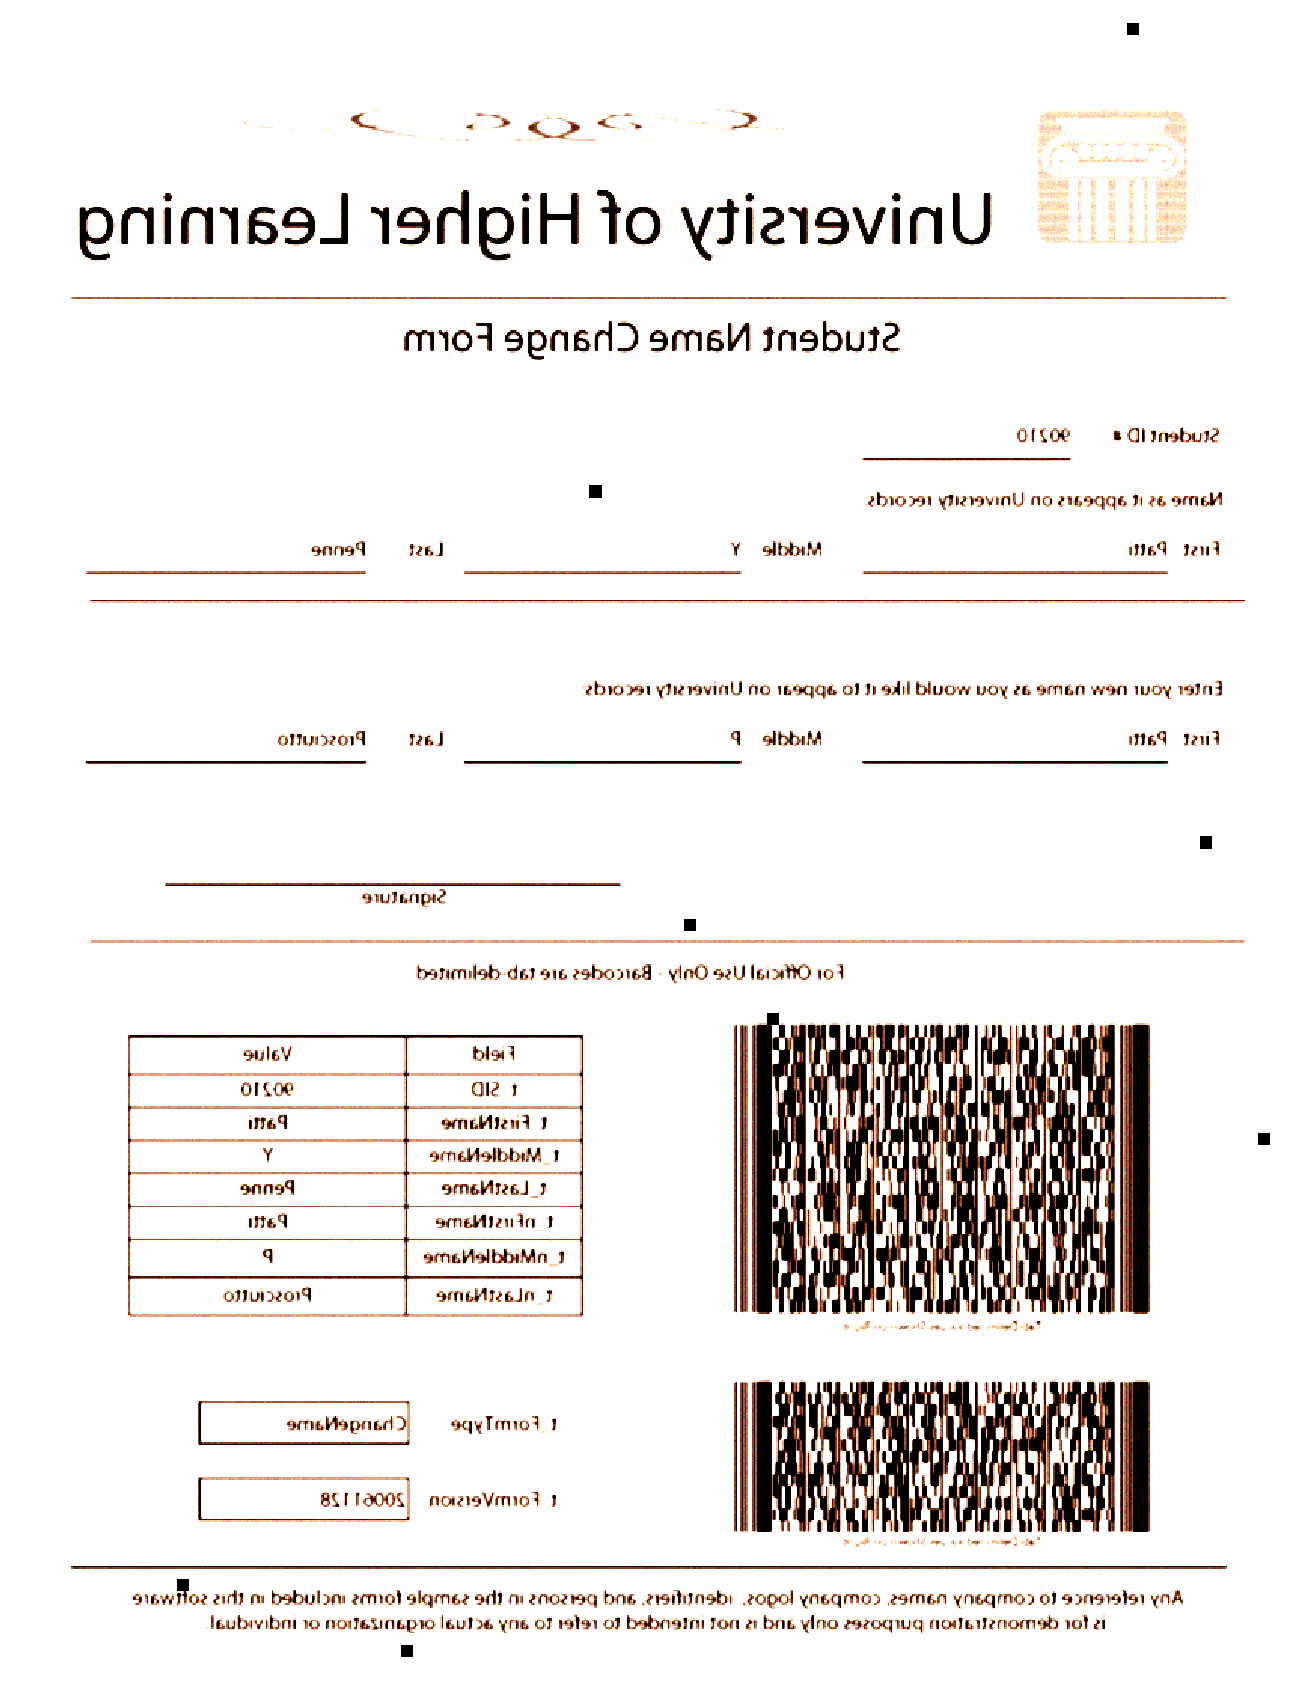

In [43]:
show_augmented(ex2_augmentations(), form, STUDENT_ID_BBOX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


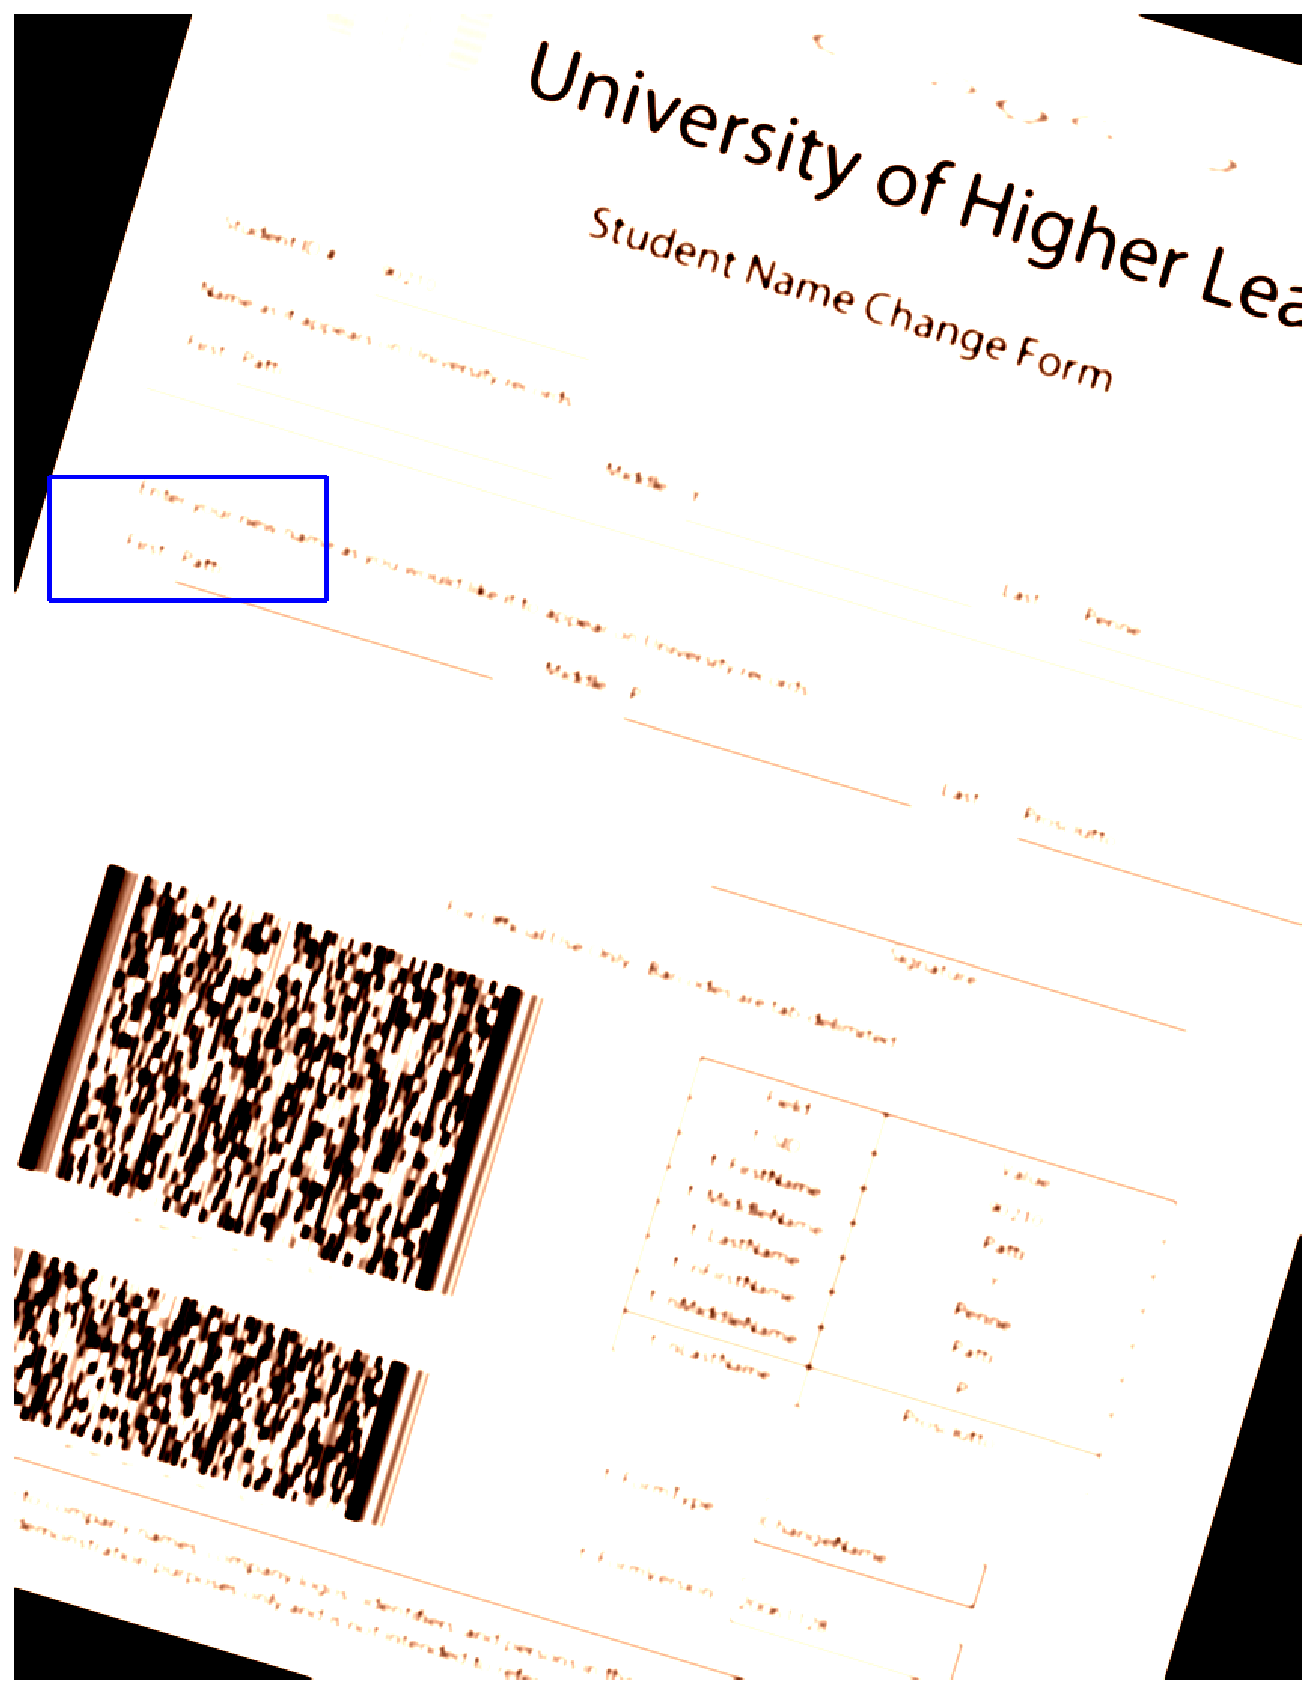

In [44]:
show_augmented(ex3_augmentations(), form, STUDENT_ID_BBOX)